<a href="https://colab.research.google.com/github/jayavardhan18112000/T20_world_cup_2022_data_analysis_python/blob/main/T20_World_Cup_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file="/content/t20-world-cup-22.csv"
df=pd.read_csv(file)
df.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler,best bowling figure
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee,3-6
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran,5-10
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana,2-19
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya,3-30
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed,4-25


In [5]:
df.describe()

,first innings score,first innings wickets,second innings score,second innings wickets,highest score
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,153.366667,6.866667,130.800000,6.233333,64.066667
std,30.440992,2.096521,25.511863,3.013571,17.264541
min,79.000000,2.000000,51.000000,0.000000,32.000000
25%,134.000000,5.250000,113.500000,5.000000,52.500000
50%,157.000000,7.500000,136.000000,6.000000,62.000000
75%,179.000000,8.000000,147.750000,9.000000,70.250000
max,205.000000,10.000000,170.000000,10.000000,109.000000


In [6]:
missing_count=df.isnull().sum()
print(missing_count)

venue                     0
team1                     0
team2                     0
stage                     0
toss winner               3
toss decision             3
first innings score       3
first innings wickets     3
second innings score      3
second innings wickets    3
winner                    4
won by                    4
player of the match       4
top scorer                3
highest score             3
best bowler               3
best bowling figure       3
dtype: int64


In [7]:
df.dropna(inplace=True)

In [8]:
new_missing_count=df.isnull().sum()
print(new_missing_count)

venue                     0
team1                     0
team2                     0
stage                     0
toss winner               0
toss decision             0
first innings score       0
first innings wickets     0
second innings score      0
second innings wickets    0
winner                    0
won by                    0
player of the match       0
top scorer                0
highest score             0
best bowler               0
best bowling figure       0
dtype: int64


In [9]:
# Dropping the "best bowling figure" column as it contains irrelevant data
# All values under this column are dates, which do not provide relevant information for analysis
df.drop("best bowling figure", axis=1, inplace=True)

In [10]:
df.head()

,venue,team1,team2,stage,toss winner,toss decision,first innings score,first innings wickets,second innings score,second innings wickets,winner,won by,player of the match,top scorer,highest score,best bowler
0,SCG,New Zealand,Australia,Super 12,Australia,Field,200.0,3.0,111.0,10.0,New Zealand,Runs,Devon Conway,Devon Conway,92.0,Tim Southee
1,Optus Stadium,Afghanistan,England,Super 12,England,Field,112.0,10.0,113.0,5.0,England,Wickets,Sam Curran,Ibrahim Zadran,32.0,Sam Curran
2,Blundstone Arena,Ireland,Sri lanka,Super 12,Ireland,Bat,128.0,8.0,133.0,1.0,Sri lanka,Wickets,Kusal Mendis,Kusal Mendis,68.0,Maheesh Theekshana
3,MCG,Pakistan,India,Super 12,India,Field,159.0,8.0,160.0,6.0,India,Wickets,Virat Kohli,Virat Kohli,82.0,Hardik Pandya
4,Blundstone Arena,Bangladesh,Netherlands,Super 12,Netherlands,Field,144.0,8.0,135.0,10.0,Bangladesh,Runs,Taskin Ahmed,Colin Ackermann,62.0,Taskin Ahmed


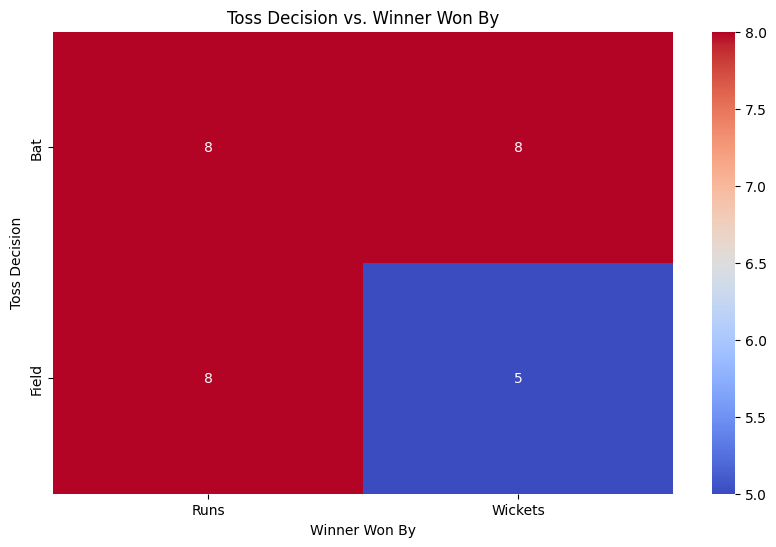

In [11]:
# Create a new DataFrame to store the counts
toss_outcome_counts = pd.crosstab(df['toss decision'], df['won by'])

# Set up the heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(toss_outcome_counts, annot=True, fmt='d', cmap='coolwarm', cbar=True)

# Set plot labels and title
plt.xlabel('Winner Won By')
plt.ylabel('Toss Decision')
plt.title('Toss Decision vs. Winner Won By')

# Show the heatmap
plt.show()


The teams that chose to field first had a lower probability of winning, and the teams that chose to bat first had an equal chance of winning for both themselves and the opposition team.
This indicates that, in the dataset, teams that won the toss and chose to bat first had a more balanced chance of winning compared to teams that chose to field first.

In [12]:
venue_unique_data=df['venue'].unique()
print(venue_unique_data)

['SCG' 'Optus Stadium' 'Blundstone Arena' 'MCG' 'The Gabba'
 'Adelaide Oval']


In [13]:
!pip install geopy

In [14]:
from geopy.geocoders import Nominatim

# Create a geocoder object
geolocator = Nominatim(user_agent="cricket_venues")

# Initialize an empty list to store venue data
venue_data = []

# Iterate through the venues and fetch their coordinates
for venue in venue_unique_data:
    location = geolocator.geocode(venue)
    if location:
        venue_info = {
            "venue": venue,
            "latitude": location.latitude,
            "longitude": location.longitude
        }
        venue_data.append(venue_info)

# Print the venue data
for venue_info in venue_data:
    print(venue_info)


{'venue': 'SCG', 'latitude': 39.0528866, 'longitude': -28.012980339850664}
{'venue': 'Optus Stadium', 'latitude': -31.9510448, 'longitude': 115.88907562766687}
{'venue': 'Blundstone Arena', 'latitude': -42.877295200000006, 'longitude': 147.3736444389731}
{'venue': 'MCG', 'latitude': -37.819908999999996, 'longitude': 144.98322500667754}
{'venue': 'The Gabba', 'latitude': -27.48588505, 'longitude': 153.0379847334293}
{'venue': 'Adelaide Oval', 'latitude': -34.9155596, 'longitude': 138.59614787254225}


In [15]:
!pip install folium


In [16]:
import folium
from folium.plugins import HeatMap

In [17]:
m = folium.Map(location=[-25.2744, 133.7751], zoom_start=4)

# Create a list of (latitude, longitude, weight) tuples for HeatMap
heat_data = [(data["latitude"], data["longitude"], 1) for data in venue_data]

# Add the heatmap layer to the map
HeatMap(heat_data).add_to(m)

# Display the map
m.save("cricket_heatmap.html")

In [18]:
from IPython.display import IFrame
IFrame("cricket_heatmap.html", width="100%", height=500)

Based on the dataset, it appears that all the matches took place in Australia. This suggests that Australia likely hosted the T20 World Cup in 2022. The concentration of matches in a single country may indicate that it was the host nation for the tournament.

In [19]:
import pandas as pd
import plotly.graph_objects as go


data = df[['venue', 'won by']].to_dict('records')

# Get unique venues and 'won_by' categories
venues = df['venue'].unique()
won_by_categories = df['won by'].unique()

# Create a mapping of each combination of venue and 'won_by' to a numeric value
value_mapping = {}
for venue in venues:
    for won_by in won_by_categories:
        value = len(df[(df['venue'] == venue) & (df['won by'] == won_by)])
        value_mapping[(venue, won_by)] = value

# Create a list of nodes
nodes = [{'label': venue} for venue in venues] + [{'label': won_by} for won_by in won_by_categories]

# Create a list of links
links = []
for venue in venues:
    for won_by in won_by_categories:
        source = venues.tolist().index(venue)
        target = len(venues) + won_by_categories.tolist().index(won_by)
        value = value_mapping[(venue, won_by)]
        links.append({'source': source, 'target': target, 'value': value})

# Create a Plotly Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[node['label'] for node in nodes],
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
    ),
))

fig.update_layout(title_text="Venue vs. Pitch", font_size=10)
fig.show()



MCG, Adelaide Oval, and Blundstone Arena offer relatively balanced pitch conditions, providing opportunities for both bowlers and batsmen.
Optus Stadium leans towards batting pitches, with more matches won by wickets. On the other hand, The Gabba and SCG favor bowlers, as evidenced by a higher number of matches won by runs.